In [1]:
import re
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, MaxNLocator
from matplotlib.colors import Normalize, PowerNorm
%matplotlib inline

In [2]:
def get_df(athlete_id: int):
    athlete_url = f'https://www.parkrun.ru/results/athleteeventresultshistory/?athleteNumber={athlete_id}&eventNumber=0'
    page_all_results = requests.get(athlete_url, headers={'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:86.0) Gecko/20100101 Firefox/86.0'})
    df = pd.read_html(page_all_results.text)[2]
    # df['Дата parkrun'] = df['Дата parkrun'].apply(pd.to_datetime)
    df['Номер пробежки'] = df['Номер пробежки'].apply(int)
    df['Место'] = df['Место'].apply(int)
    df['time'] = df['Время'].transform(lambda time: sum(x * int(t) for x, t in zip([1/60, 1, 60], time.split(':')[::-1])))
    return df

In [3]:
my_id = 875743
my_df = get_df(my_id)

In [4]:
my_df

,Паркран,Дата parkrun,Номер пробежки,Место,Время,Рейтинг,ЛР?,time
0,Kuzminki,24/04/2021,207,21,23:09,58.10%,NaN,23.150000
1,Tula Central,23/01/2021,178,2,20:00,67.25%,NaN,20.000000
2,Tula Central,16/01/2021,177,1,20:11,66.64%,NaN,20.183333
3,Tula Central,09/01/2021,176,2,19:52,67.70%,NaN,19.866667
4,Tula Central,02/01/2021,174,1,21:39,62.12%,NaN,21.650000
...,...,...,...,...,...,...,...,...
180,Gorky Park,25/10/2014,25,1,18:07,71.76%,NaN,18.116667
181,Kolomenskoe,22/03/2014,4,2,19:14,67.42%,NaN,19.233333
182,Kolomenskoe,15/03/2014,3,10,20:01,64.78%,NaN,20.016667
183,Kolomenskoe,08/03/2014,2,2,18:59,68.31%,NaN,18.983333


In [5]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Паркран         185 non-null    object 
 1   Дата parkrun    185 non-null    object 
 2   Номер пробежки  185 non-null    int64  
 3   Место           185 non-null    int64  
 4   Время           185 non-null    object 
 5   Рейтинг         185 non-null    object 
 6   ЛР?             22 non-null     object 
 7   time            185 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 11.7+ KB


In [6]:
vizavi_df = get_df(925293)

In [7]:
vizavi_df

,Паркран,Дата parkrun,Номер пробежки,Место,Время,Рейтинг,ЛР?,time
0,Babushkinsky na Yauze,24/04/2021,72,11,24:04,54.50%,NaN,24.066667
1,Mytishchi Central Park,10/04/2021,2,1,18:37,70.46%,NaN,18.616667
2,Fili,03/04/2021,1,3,18:32,70.77%,NaN,18.533333
3,Kimry,27/03/2021,132,1,19:54,65.91%,ЛР,19.900000
4,Yoshkar-Ola Alleya Zdorovya,13/03/2021,9,7,21:59,59.67%,NaN,21.983333
...,...,...,...,...,...,...,...,...
231,Izmailovo,14/02/2015,33,10,36:16,35.57%,NaN,36.266667
232,Kolomenskoe,07/02/2015,50,6,22:49,56.54%,NaN,22.816667
233,Kolomenskoe,20/12/2014,43,19,24:37,52.40%,NaN,24.616667
234,Kolomenskoe,08/11/2014,37,16,21:46,59.26%,ЛР,21.766667


In [8]:
battle_df = pd.merge(my_df, vizavi_df, on=['Дата parkrun', 'Паркран'])
battle_df['time_diff'] = battle_df['time_x'] - battle_df['time_y']
battle_df

,Паркран,Дата parkrun,Номер пробежки_x,Место_x,Время_x,Рейтинг_x,ЛР?_x,time_x,Номер пробежки_y,Место_y,Время_y,Рейтинг_y,ЛР?_y,time_y,time_diff
0,Kuzminki,09/11/2019,183,2,17:08,77.92%,NaN,17.133333,183,3,18:19,71.25%,NaN,18.316667,-1.183333
1,Kuzminki,20/10/2018,126,36,23:08,57.35%,NaN,23.133333,126,7,18:24,70.65%,NaN,18.400000,4.733333
2,Izmailovo,07/07/2018,210,2,17:33,75.12%,ЛР,17.550000,210,5,18:20,70.91%,ЛР,18.333333,-0.783333
3,Kuzminki,16/06/2018,108,232,30:39,43.01%,NaN,30.650000,108,9,17:52,72.76%,ЛР,17.866667,12.783333
4,Gorky Park,12/05/2018,210,2,17:39,74.69%,NaN,17.650000,210,3,17:44,73.31%,ЛР,17.733333,-0.083333
5,Kuzminki,07/01/2018,85,1,17:50,73.93%,NaN,17.833333,85,2,18:36,69.71%,NaN,18.600000,-0.766667
6,Kolomenskoe,23/12/2017,200,5,18:12,72.44%,NaN,18.200000,200,8,18:56,68.49%,NaN,18.933333,-0.733333
7,Kuzminki,11/11/2017,75,2,17:23,75.84%,NaN,17.383333,75,4,18:20,70.73%,NaN,18.333333,-0.950000
8,Kuzminki,17/06/2017,54,5,17:37,74.46%,NaN,17.616667,54,8,18:11,71.31%,ЛР,18.183333,-0.566667
9,Kuzminki,20/05/2017,50,3,17:45,73.90%,NaN,17.750000,50,6,18:34,69.84%,ЛР,18.566667,-0.816667


In [9]:
wins = battle_df['time_x'] < battle_df['time_y']
cor = pd.value_counts(wins)

In [10]:
len(battle_df)

25

In [11]:
battle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Паркран           25 non-null     object 
 1   Дата parkrun      25 non-null     object 
 2   Номер пробежки_x  25 non-null     int64  
 3   Место_x           25 non-null     int64  
 4   Время_x           25 non-null     object 
 5   Рейтинг_x         25 non-null     object 
 6   ЛР?_x             4 non-null      object 
 7   time_x            25 non-null     float64
 8   Номер пробежки_y  25 non-null     int64  
 9   Место_y           25 non-null     int64  
 10  Время_y           25 non-null     object 
 11  Рейтинг_y         25 non-null     object 
 12  ЛР?_y             9 non-null      object 
 13  time_y            25 non-null     float64
 14  time_diff         25 non-null     float64
dtypes: float64(3), int64(4), object(8)
memory usage: 3.1+ KB


In [12]:
for i, row in battle_df.iterrows():
    print(i, row['Дата parkrun'], row['Время_x'], row['Время_y'], row['Паркран'], sep='\t')

0	09/11/2019	17:08	18:19	Kuzminki
1	20/10/2018	23:08	18:24	Kuzminki
2	07/07/2018	17:33	18:20	Izmailovo
3	16/06/2018	30:39	17:52	Kuzminki
4	12/05/2018	17:39	17:44	Gorky Park
5	07/01/2018	17:50	18:36	Kuzminki
6	23/12/2017	18:12	18:56	Kolomenskoe
7	11/11/2017	17:23	18:20	Kuzminki
8	17/06/2017	17:37	18:11	Kuzminki
9	20/05/2017	17:45	18:34	Kuzminki
10	15/04/2017	25:43	18:49	Vernadskogo
11	04/03/2017	17:13	19:52	Kolomenskoe
12	04/02/2017	18:10	21:32	Kuzminki
13	21/01/2017	18:55	21:59	Kuzminki
14	29/10/2016	19:47	20:00	Kuzminki
15	01/10/2016	18:50	18:35	Kuzminki
16	30/07/2016	19:15	18:49	Kuzminki
17	09/07/2016	19:54	18:24	Gorky Park
18	18/06/2016	20:53	18:47	Kuzminki
19	05/03/2016	19:55	21:25	Gorky Park
20	06/02/2016	20:09	21:06	Gorky Park
21	03/10/2015	18:35	19:19	Gorky Park
22	09/05/2015	18:33	19:42	Gorky Park
23	21/03/2015	18:39	20:50	Gorky Park
24	20/12/2014	19:15	24:37	Kolomenskoe


In [13]:
battle_df['time_diff'].sum()

1.6333333333333222

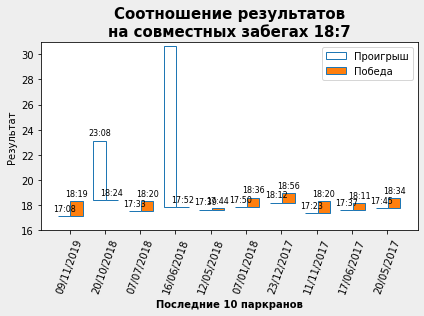

In [14]:
battle_df = battle_df.head(10)
def label_bars(marks, heights, rects):
    for mark, height, rect in zip(marks, heights, rects):
        ax.annotate(f'{mark}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset.
                    textcoords='offset points',
                    ha='center', va='bottom', size=8, clip_on=True)

fig = plt.figure(figsize=(6, 4.5))
fig.patch.set_facecolor('#eeeeee')
ax = fig.add_subplot()

xlabels = battle_df['Дата parkrun']
x = xlabels.index
ax.set_xticks(x)
ax.set_xticklabels(xlabels, rotation=70)
spacing = 0.3  # spacing between hat groups
width = (1 - spacing) / 2
heights0 = battle_df['time_x'].combine(battle_df['time_y'], min)
rects = ax.bar(x - spacing/2, battle_df['time_x'] - heights0, width, bottom=heights0, label='Проигрыш', fill=False, edgecolor='#1f77b4')
label_bars(battle_df['Время_x'], battle_df['time_x'], rects)
rects = ax.bar(x + 0.5 - spacing, battle_df['time_y'] - heights0, width, bottom=heights0, label='Победа', edgecolor='#1f77b4')
label_bars(battle_df['Время_y'], battle_df['time_y'], rects)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Последние 10 паркранов', fontweight='bold')
ax.set_ylabel('Результат')
ax.set_ylim(int(min(battle_df['time_x'].min(), battle_df['time_y'].min()))-1, 
int(max(battle_df['time_x'].max(), battle_df['time_y'].max()))+1)
ax.set_title(f'Соотношение результатов\nна совместных забегах {cor[True]}:{cor[False]}', size=15, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.savefig('battle.png')

In [15]:
cor

True     18
False     7
dtype: int64

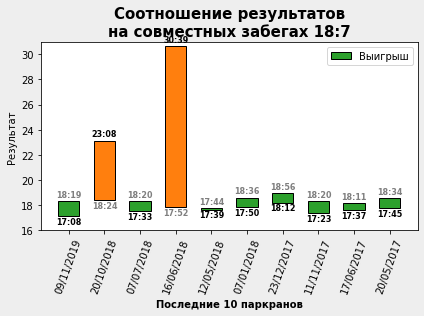

In [16]:
battle_df = battle_df.head(10)
def label_bars(marks, heights, rects, wins, color):
    for mark, height, rect, win in zip(marks, heights, rects, wins):
        ax.annotate(f'{mark}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -10 if win else 2),  # 3 points vertical offset.
                    textcoords='offset points',
                    ha='center', va='bottom', size=8, color=color, fontweight='bold')

fig = plt.figure(figsize=(6, 4.5))
fig.patch.set_facecolor('#eeeeee')
ax = fig.add_subplot()

xlabels = battle_df['Дата parkrun']
x = xlabels.index
ax.set_xticks(x)
ax.set_xticklabels(xlabels, rotation=70)
spacing = 0.3  # spacing between hat groups
width = (1 - spacing) / 2
heights0 = battle_df['time_x'].combine(battle_df['time_y'], min)
heights1 = battle_df['time_x'].combine(battle_df['time_y'], max)

rects = ax.bar(x, heights1 - heights0, 0.6, bottom=heights0, label='Выигрыш', edgecolor='black', color=wins.where(wins, '#ff7f0e').where(~wins, '#2ca02c'))
label_bars(battle_df['Время_y'], battle_df['time_y'], rects, ~wins, '#7f7f7f')
label_bars(battle_df['Время_x'], battle_df['time_x'], rects, wins, 'black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Последние 10 паркранов', fontweight='bold')
ax.set_ylabel('Результат')
ax.set_ylim(int(min(battle_df['time_x'].min(), battle_df['time_y'].min()))-1, 
int(max(battle_df['time_x'].max(), battle_df['time_y'].max()))+1)
ax.set_title(f'Соотношение результатов\nна совместных забегах {cor[True]}:{cor[False]}', size=15, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.savefig('battle.png')